In [4]:
#@title Librerias
from typing import Annotated
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import sympy as sp

# Actividad 03: Errores y estabilidad

---
### Profesor: Juan Marcos Marín
### Nombre: Edwar Isaías Pacheco Rojas
### CC: 1017240283
*Métodos computacionales 2024-II*

---

#1. Serie Seno
Considere la serie de Taylor para el seno

$$\sin(x) = \sum^{\infty}_{n=0} (-1)^{n}\frac{x^{2n+1}}{(2n+1)!} $$

a. Defina una función que a partir de la *serie de Taylor* y un valor de $x$ en radianes encuentre el valor de $\sin(x)$.


b. Usando $x$ como `float32` encuentre cuántos términos de la serie son necesarios para obtener una convergencia con un error absoluto menor al $ϵ$ de la máquina para dicho tipo de variable. Para el valor exacto use `math.sin()`.


c. Ahora, usando $x$ como `float64` encuentre cuántos términos de la serie son necesarios para obtener una convergencia con un error absoluto menor al $ϵ$ de la máquina para dicho tipo de variable. Para el valor exacto use `math.sin()`.


d. Describa los errores porcentuales para cada cálculo y por qué pueden existir diferencias.

In [5]:
def reducir_rango(x):
    """Reduce el valor de x al rango [-pi, pi] para mejorar la convergencia de la serie."""
    return (x + math.pi) % (2 * math.pi) - math.pi

def taylor_sin_convergencia(x, precision='float64'):
    """Calcula el seno de x usando la serie de Taylor y retorna el número de términos
    necesarios para que el error absoluto sea menor que el epsilon de la máquina para
    el tipo de precisión especificado ('float32' o 'float64').

    Args:
        x (float): El valor de x en radianes.
        precision (str): 'float32' o 'float64' para determinar la precisión deseada.

    Returns:
        tuple: (n_terms, sin_approx, exact_value, error_abs, errores_abs, errores_percent)
    """
    # Reducimos x al rango [-pi, pi]
    x = reducir_rango(x)

    # Configuramos el tipo de precisión y epsilon de máquina
    if precision == 'float32':
        epsilon = np.finfo(np.float32).eps
        dtype = np.float32
    elif precision == 'float64':
        epsilon = np.finfo(np.float64).eps
        dtype = np.float64
    else:
        raise ValueError("La precisión debe ser 'float32' o 'float64'")

    # Inicializamos variables
    n_terms = 0
    sin_approx = dtype(0)
    exact_value = dtype(math.sin(x))

    # Arrays para almacenar errores en cada iteración
    errores_abs = []
    errores_percent = []

    while True:
        # Calculamos el término n-ésimo de la serie
        term = dtype((-1)**n_terms * (x**(2 * n_terms + 1)) / math.factorial(2 * n_terms + 1))
        sin_approx += term
        n_terms += 1

        # Calculamos el error absoluto y el error porcentual
        error_abs = abs(sin_approx - exact_value)
        error_percent = abs((sin_approx - exact_value) / exact_value) * 100

        # Guardamos los errores en los arrays
        errores_abs.append(error_abs)
        errores_percent.append(error_percent)

        # Verificamos si el error absoluto es menor que epsilon
        if error_abs < epsilon:
            break

        # Si el término añadido es menor que epsilon, detenemos la serie (evita acumulación innecesaria)
        if abs(term) < epsilon:
            break

    return n_terms, sin_approx, exact_value, error_abs, errores_abs, errores_percent

# Ejemplo
x_value = float(input("Ingrese el valor de x en radianes: "))
precision_type = input("Ingrese la precisión deseada ('float32' o 'float64'): ").strip()

try:
    n_terms, sin_approx, exact_value, error_abs, errores_abs, errores_percent = taylor_sin_convergencia(x_value, precision_type)
    print(f"Se necesitan {n_terms} términos para una convergencia con {precision_type}.")
    print(f"Valor aproximado de sin({x_value}): {sin_approx}")
    print(f"Valor exacto de sin(x): {exact_value}")
    print(f"Error absoluto final: {error_abs}")
    print("\nErrores absolutos por iteración:", errores_abs)
    print("Errores porcentuales por iteración:", errores_percent)
except ValueError as e:
    print(f"Error: {e}")

Ingrese el valor de x en radianes: 1.2
Ingrese la precisión deseada ('float32' o 'float64'): float64
Se necesitan 10 términos para una convergencia con float64.
Valor aproximado de sin(1.2): 0.9320390859672264
Valor exacto de sin(x): 0.9320390859672264
Error absoluto final: 0.0

Errores absolutos por iteración: [0.2679609140327738, 0.020039085967226367, 0.0006969140327736101, 1.403453865500559e-05, 1.844327736089113e-07, 1.70648872810375e-09, 1.171984731485054e-11, 6.217248937900877e-14, 2.220446049250313e-16, 0.0]
Errores porcentuales por iteración: [28.74996532518768, 2.1500263528573744, 0.07477304796186583, 0.0015057886376558132, 1.9788094339146264e-05, 1.830919704759845e-07, 1.2574416128362506e-09, 6.670588209773313e-12, 2.3823529320618977e-14, 0.0]


d) Los errores porcentuales no presentan diferencia a 20 cifras decimales; sin embargo, sí es evidente en los errores absolutos. Esto es así debido al épsilon de la máquina: este hace que los valores arrojados sean más exactos en un caso que en el otro, con lo que la diferencia del valor aproximado y real "difiera poco o nada" de cero.
Es decir: para float32, el épsilon es más grande, y aunque la serie de Taylor converge rápidamente, la diferencia del valor real y aproximado permite obtener un error absoluto pequeño pero diferente de cero.
Para float64, el épsilon es más pequeño, con lo que se necesitan más términos de la serie para aproximar la función seno, y en este aumento de términos necesarios, la aproximación se acerca más y más al valor real, con lo que el error absoluto es "indistinguible" de cero.


#2. Serie Exponencial
Considere la serie para $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}

a. Calcula la serie para $x \le 1$ y compárela con la función incorporada `np.exp(x)` (asuma que la función exponencial incorporada es exacta). Elegir un $N$ para el cual el siguiente término en la serie no sea más que $10^{-7}$ de la suma hasta ese punto.

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}


b. Examine los términos de la serie para $x\approx 10$ y observa las cancelaciones sustractivas significativas que ocurren cuando términos grandes se suman para dar respuestas pequeñas. En particular, imprime la cancelación casi perfecta en $n \approx x − 1$.

c. Compruebe si se obtiene una mejor precisión siendo ingenioso y usando $e^{−x} = \frac{1}{e^x}$ para valores grandes de $x$. Esto elimina la cancelación sustractiva, pero no elimina todos los errores de redondeo.


d. Incrementando progresivamente $x$ de 1 a 10, y luego de 10 a 100, usa el programa para determinar experimentalmente cuándo la serie comienza a perder precisión, y cuándo la serie ya no converge.


e. Realiza una serie de gráficos del error versus $N$ para diferentes valores de $x$.

In [6]:
def factorial(n: int) -> int:

    """Calcular el factorial de un número entero no negativo.
    Args:
        n (int): Un número entero no negativo.
    Returns:
        int: El factorial de n, n!.
    Raises:
        ValueError: Si n es negativo.
    """

    if n < 0:
        raise ValueError("El factorial está definido solo para números no negativos.")
    elif n == 0:
        return 1
    else:
        result = 1
        for i in range(1, n + 1):
            result *= i
        return result



In [7]:
def taylor_exp(x: float):

  """
  Calcular la aproximación de e^(-x) usando la serie de Taylor.
  Args:
    x (float): Un número real.
  Returns:
    return n, exp_approx, exact_value, error_abs, errores_abs, errores_percent, termino_serie, suma_parcial
  """

  n = 0
  termino_N = 1  # Valor inicial del término para truncar la serie.
  exp_approx = 0
  exact_value = math.exp(-x)

  # Arrays para errores y términos de la serie
  max_iter = 10000
  errores_abs = np.zeros(max_iter)
  errores_percent = np.zeros(max_iter)
  termino_serie = np.zeros(max_iter)
  suma_parcial = np.zeros(max_iter)

  try:
    while termino_N > abs(1e-7 * exp_approx):

      termino_N = abs((-1) ** (n + 1) * (x ** n) / factorial(n + 1))

      # Suma de la serie hasta el n-ésimo término
      term = (-1) ** n * (x ** n) / factorial(n)
      exp_approx += term
      n += 1

      # Cálculo del error absoluto y porcentual
      error_abs = abs(exp_approx - exact_value)
      error_percent = abs((exp_approx - exact_value) / exact_value) * 100

      # Almacenamiento de errores y términos
      errores_abs[n] = error_abs
      errores_percent[n] = error_percent
      termino_serie[n] = term
      suma_parcial[n] = exp_approx

    return n, exp_approx, exact_value, error_abs, errores_abs[:n], errores_percent[:n], termino_serie[:n], suma_parcial[:n]

  except OverflowError:  # Retornar hasta que ocurre un error.
    return n, exp_approx, exact_value, error_abs, errores_abs[:n], errores_percent[:n], termino_serie[:n], suma_parcial[:n]



In [8]:
# Ejemplo de uso para analizar cancelaciones sustractivas en x = 10
x = 10
n, approx_value, exact_value, error_abs, errores_abs, errores_percent, termino_serie, suma_parcial = taylor_exp(x)

print("Número de términos N:", n)
print("Aproximación de Taylor:", approx_value)
print("Valor exacto:", exact_value)
print("Error absoluto final:", error_abs)
print("\nTérminos de la serie:", termino_serie)
print("\nSuma parcial en cada paso:", suma_parcial)
print("\nErrores absolutos en cada paso:", errores_abs)
print("\nErrores porcentuales en cada paso:", errores_percent)

Número de términos N: 44
Aproximación de Taylor: 4.5399898677314684e-05
Valor exacto: 4.5399929762484854e-05
Error absoluto final: 3.108517017061255e-11

Términos de la serie: [ 0.00000000e+00  1.00000000e+00 -1.00000000e+01  5.00000000e+01
 -1.66666667e+02  4.16666667e+02 -8.33333333e+02  1.38888889e+03
 -1.98412698e+03  2.48015873e+03 -2.75573192e+03  2.75573192e+03
 -2.50521084e+03  2.08767570e+03 -1.60590438e+03  1.14707456e+03
 -7.64716373e+02  4.77947733e+02 -2.81145725e+02  1.56192070e+02
 -8.22063525e+01  4.11031762e+01 -1.95729411e+01  8.89679139e+00
 -3.86817017e+00  1.61173757e+00 -6.44695028e-01  2.47959626e-01
 -9.18368986e-02  3.27988924e-02 -1.13099629e-02  3.76998763e-03
 -1.21612504e-03  3.80039075e-04 -1.15163356e-04  3.38715754e-05
 -9.67759296e-06  2.68822027e-06 -7.26546018e-07  1.91196321e-07
 -4.90246976e-08  1.22561744e-08 -2.98931083e-09  7.11740673e-10]

Suma parcial en cada paso: [ 0.00000000e+00  1.00000000e+00 -9.00000000e+00  4.10000000e+01
 -1.25666667e+0

In [9]:
def taylor_exp_redef(x):

  """
  Redefinimos la función exp(-x) como 1 / exp(x) para eliminar las sustracciones.
  También implementamos una redefnición del factorial: en la función anterior para
  la aproximación del exp(-x) calcuamos el factorial en cada iteración; a continuación,
  almacenamos su valor tras cada ieración.
  """

  n = 0
  termino_N = 1  # Valor inicial del término
  exp_approx = 0
  exact_value = math.exp(-x)

  # Arrays para errores y términos de la serie
  max_iter = 10000
  errores_abs = np.zeros(max_iter)
  errores_percent = np.zeros(max_iter)
  termino_serie = np.zeros(max_iter)
  suma_parcial = np.zeros(max_iter)

  # Inicialización del factorial de n
  current_factorial = 1  # Factorial actual

  try:
    while termino_N > abs(1e-7 * exp_approx):

      if n > 0:
        current_factorial *= n

      termino_N = abs((x ** n) / factorial(n + 1))

      # Suma de la serie hasta el n-ésimo término de exp(x)
      term = x ** n / current_factorial
      exp_approx += term
      n += 1

      # Aproximación de exp(-x) como 1 / exp(x)
      exp_approx_redef = 1 / exp_approx

      # Cálculo del error absoluto y porcentual con 1 / exp (x)
      error_abs = abs(exp_approx_redef - exact_value)
      error_percent = abs((exp_approx_redef - exact_value) / exact_value) * 100

      # Almacenamiento de errores y términos
      errores_abs[n] = error_abs
      errores_percent[n]= error_percent
      termino_serie[n] = 1 / term
      suma_parcial[n] = exp_approx_redef

    return n, exp_approx_redef, exact_value, error_abs, errores_abs[:n], errores_percent[:n], termino_serie[:n], suma_parcial[:n]

  except (OverflowError, ZeroDivisionError):
    return n, exp_approx_redef, exact_value, error_abs, errores_abs[:n], errores_percent[:n], termino_serie[:n], suma_parcial[:n]



In [10]:
# Ejemplo de uso para analizar cancelaciones sustractivas en x = 10
x = 10
n, approx_value, exact_value, error_abs, errores_abs, errores_percent, termino_serie, suma_parcial = taylor_exp_redef(x)

print("Número de términos N:", n)
print("Aproximación de Taylor:", approx_value)
print("Valor exacto:", exact_value)
print("Error absoluto final:", error_abs)
print("\nTérminos de la serie:", termino_serie)
print("\nSuma parcial en cada paso:", suma_parcial)
print("\nErrores absolutos en cada paso:", errores_abs)
print("\nErrores porcentuales en cada paso:", errores_percent)

Número de términos N: 29
Aproximación de Taylor: 4.539996446924319e-05
Valor exacto: 4.5399929762484854e-05
Error absoluto final: 3.470675833452128e-11

Términos de la serie: [0.00000000e+00 1.00000000e+00 1.00000000e-01 2.00000000e-02
 6.00000000e-03 2.40000000e-03 1.20000000e-03 7.20000000e-04
 5.04000000e-04 4.03200000e-04 3.62880000e-04 3.62880000e-04
 3.99168000e-04 4.79001600e-04 6.22702080e-04 8.71782912e-04
 1.30767437e-03 2.09227899e-03 3.55687428e-03 6.40237371e-03
 1.21645100e-02 2.43290201e-02 5.10909422e-02 1.12400073e-01
 2.58520167e-01 6.20448402e-01 1.55112100e+00 4.03291461e+00
 1.08888695e+01]

Suma parcial en cada paso: [0.00000000e+00 1.00000000e+00 9.09090909e-02 1.63934426e-02
 4.39238653e-03 1.55199172e-03 6.76742612e-04 3.48850731e-04
 2.06156555e-04 1.36409992e-04 9.91416987e-05 7.78676407e-05
 6.51571240e-05 5.73552628e-05 5.25179852e-05 4.95339583e-05
 4.77261201e-05 4.66617383e-05 4.60575213e-05 4.57285583e-05
 4.55573003e-05 4.54721514e-05 4.54317161e-05 4.

In [11]:
# d) Análisis de convergencia

# Análisis de intervalos
intervalo = np.arange(1, 101)

# Diccionarios para almacenar los resultados
resultados_intervalo = {x: {} for x in intervalo}

# Diccionario con los resultados para cada x en intervalo
for x in intervalo:
    n, approx_value, exact_value, error_abs, errores_abs, errores_percent, termino_serie, suma_parcial = taylor_exp(x)
    resultados_intervalo[x] = {
        'n': n,
        'approx_value': approx_value,
        'exact_value': exact_value,
        'error_abs': error_abs,
        'errores_abs': errores_abs,
        'errores_percent': errores_percent,
        'termino_serie': termino_serie,
        'suma_parcial': suma_parcial
    }



<ipython-input-7-82ef097bc735>:29: RuntimeWarning: overflow encountered in scalar multiply
  term = (-1) ** n * (x ** n) / factorial(n)


In [12]:
# Ejemplo
print("Resultados para x=50:")
print("Número de términos:", resultados_intervalo[50]['n'])
print("Aproximación:", resultados_intervalo[50]['approx_value'])
print("Valor exacto:", resultados_intervalo[50]['exact_value'])
print("Error absoluto:", resultados_intervalo[50]['error_abs'])
print("Errores absolutos:", resultados_intervalo[50]['errores_abs'])
print("Errores porcentuales:", resultados_intervalo[50]['errores_percent'])
print("Términos de la serie:", resultados_intervalo[50]['termino_serie'])
print("Suma parcial:", resultados_intervalo[50]['suma_parcial'])

Resultados para x=50:
Número de términos: 18
Aproximación: -90115172359.52274
Valor exacto: 1.9287498479639178e-22
Error absoluto: 90115172359.52274
Errores absolutos: [0.00000000e+00 1.00000000e+00 4.90000000e+01 1.20100000e+03
 1.96323333e+04 2.40784333e+05 2.36338233e+06 1.93380066e+07
 1.35671914e+08 8.33140090e+08 4.54914882e+09 2.23622957e+10
 9.99624522e+10 9.09166536e+10 9.01597383e+10 9.01122342e+10
 9.01154096e+10 9.01151845e+10]
Errores porcentuales: [0.00000000e+00 5.18470553e+23 2.54050571e+25 6.22683134e+26
 1.01787867e+28 1.24839586e+29 1.22534414e+30 1.00261870e+31
 7.03418923e+31 4.31958603e+32 2.35859970e+33 1.15941918e+34
 5.18275879e+34 4.71376076e+34 4.67451694e+34 4.67205399e+34
 4.67221863e+34 4.67220695e+34]
Términos de la serie: [ 0.00000000e+00  1.00000000e+00 -5.00000000e+01  1.25000000e+03
 -2.08333333e+04  2.60416667e+05 -2.60416667e+06  2.17013889e+07
 -1.55009921e+08  9.68812004e+08 -5.38228891e+09  2.69114446e+10
 -1.22324748e+11  9.04579868e+09  7.56915

# Análisis de convergencia.

El análisis de convergencia se puede hacer para las dos funciones de aproximación. \\
i) Para exp(-x), la aproximación empieza a perder precisión a partir de x mayor a siete (7); esto hace que el valor aproximado ya diera en más de un 50 %. Para mejorar la estimación, haría falta sumar más términos, pero dichos términos empiezan a oscilar entre valores muy grandes, lo que contribuye a un aumento de los errores absolutos y porcentuales.
Estas oscilaciones empiezan a equilibrarse a medida que N aumenta, permitiendo que las cancelaciones sustractivas equilibren la suma parcial, pero N debe ser arbitrariamente grande.

In [13]:
for i in intervalo[:11]:
  print(f'Análisis de convergencia para taylor_exp({i})')
  print()
  print(pd.DataFrame(resultados_intervalo[i]['errores_percent']))
  print()

Análisis de convergencia para taylor_exp(1)

             0
0     0.000000
1   171.828183
2   100.000000
3    35.914091
4     9.390606
5     1.935569
6     0.329666
7     0.047873
8     0.006061
9     0.000680
10    0.000069

Análisis de convergencia para taylor_exp(2)

             0
0     0.000000
1   638.905610
2   838.905610
3   638.905610
4   346.301870
5   146.301870
6    50.739626
7    14.940873
8     3.824984
9     0.866480
10    0.176068
11    0.032442
12    0.005469
13    0.000850
14    0.000122

Análisis de convergencia para taylor_exp(3)

              0
0      0.000000
1   1908.553692
2   4117.107385
3   4921.384231
4   4117.107385
5   2661.761327
6   1405.559900
7    628.100713
8    243.468121
9     83.370192
10    25.575912
11     7.107919
12     1.805853
13     0.422590
14     0.091666
15     0.018532
16     0.003508
17     0.000624
18     0.000105

Análisis de convergencia para taylor_exp(4)

               0
0       0.000000
1    5359.815003
2   16479.445010
3   27199

ii) Para la aproximación redefinida: para x mayor a 12, la aproximación ya presenta un error porcentual mayor al 5,8 %, lo que representa un error alto, mostrando una divergencia progresiva.

In [14]:
# Diccionario con los resultados para cada x en intervalo
for x in intervalo:
    n, approx_value, exact_value, error_abs, errores_abs, errores_percent, termino_serie, suma_parcial = taylor_exp_redef(x)
    resultados_intervalo[x] = {
        'n': n,
        'approx_value': approx_value,
        'exact_value': exact_value,
        'error_abs': error_abs,
        'errores_abs': errores_abs,
        'errores_percent': errores_percent,
        'termino_serie': termino_serie,
        'suma_parcial': suma_parcial
    }


for i in intervalo[:14]:
  print(f'Análisis de convergencia para taylor_exp_redef({i})')
  print()
  print(pd.DataFrame(resultados_intervalo[i]['errores_percent']))
  print()

<ipython-input-9-ed01bb6c4f34>:48: RuntimeWarning: divide by zero encountered in scalar divide
  termino_serie[n] = 1 / term


Análisis de convergencia para taylor_exp_redef(1)

             0
0     0.000000
1   171.828183
2    35.914091
3     8.731273
4     1.935569
5     0.367329
6     0.059454
7     0.008325
8     0.001025
9     0.000113
10    0.000011

Análisis de convergencia para taylor_exp_redef(2)

             0
0     0.000000
1   638.905610
2   146.301870
3    47.781122
4    16.669307
5     5.557944
6     1.684258
7     0.455445
8     0.109792
9     0.023750
10    0.004650
11    0.000831
12    0.000136

Análisis de convergencia para taylor_exp_redef(3)

              0
0      0.000000
1   1908.553692
2    402.138423
3    136.300434
4     54.504130
5     22.659767
6      9.160527
7      3.467029
8      1.204793
9      0.381751
10     0.110370
11     0.029242
12     0.007139
13     0.001615
14     0.000340
15     0.000067

Análisis de convergencia para taylor_exp_redef(4)

              0
0      0.000000
1   5359.815003
2    991.963001
3    319.985769
4    130.696409
5     59.023738
6     27.367380
7  

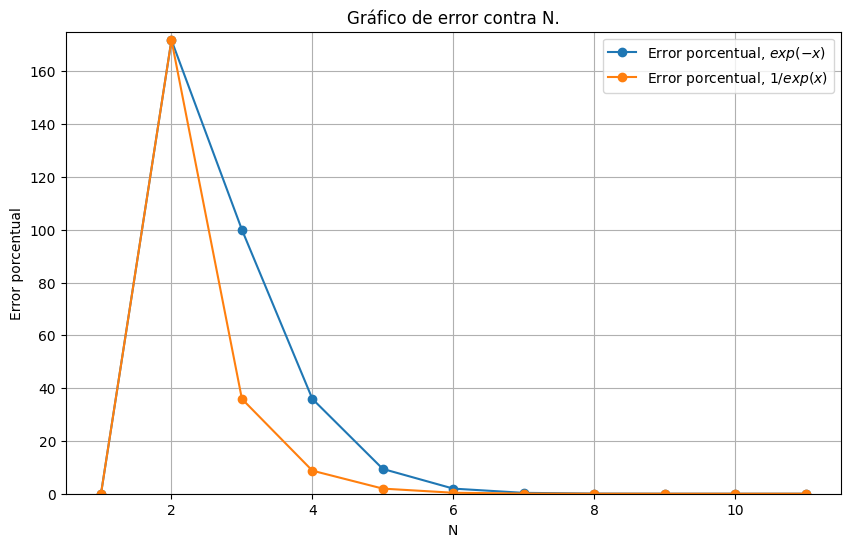

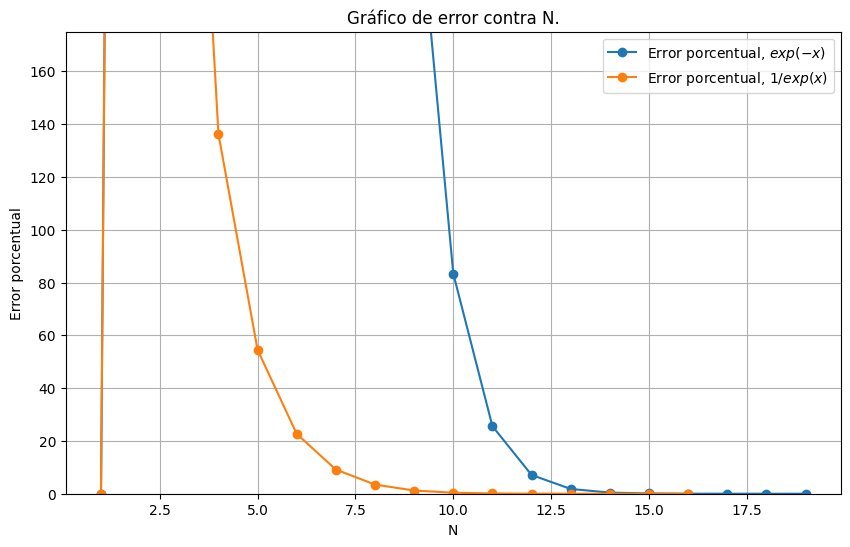

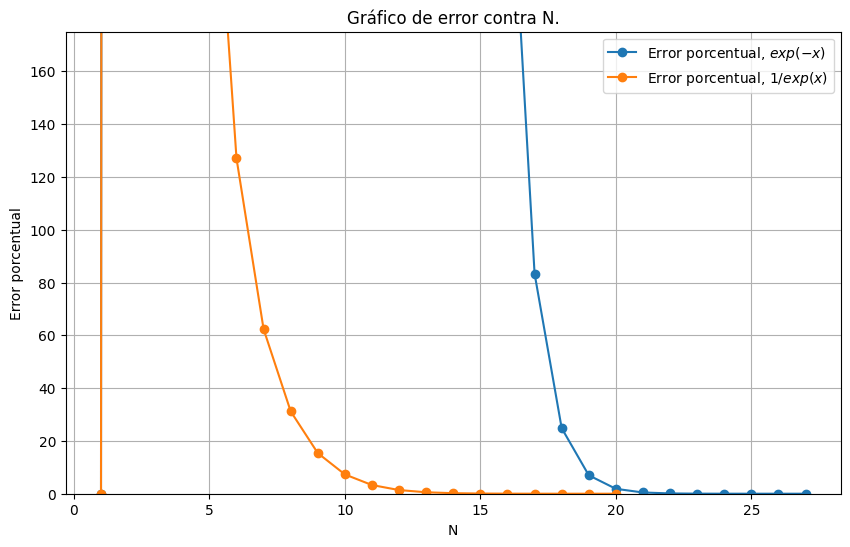

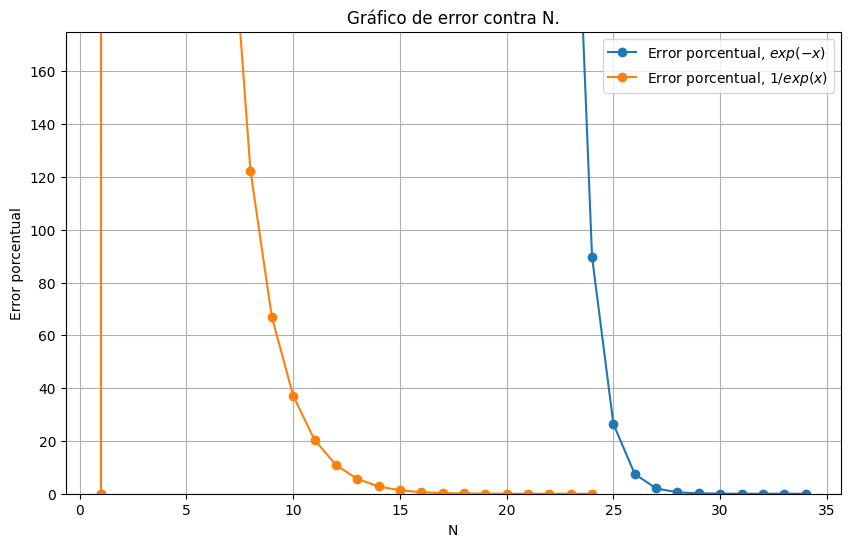

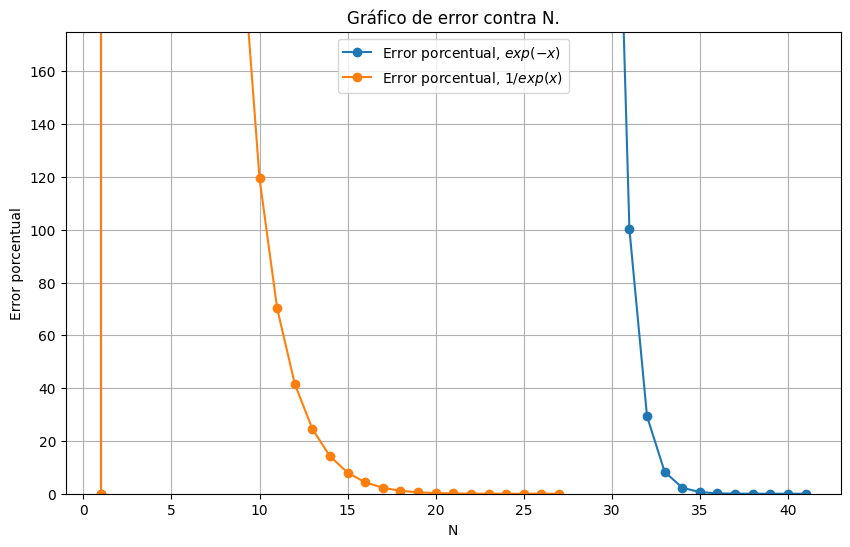

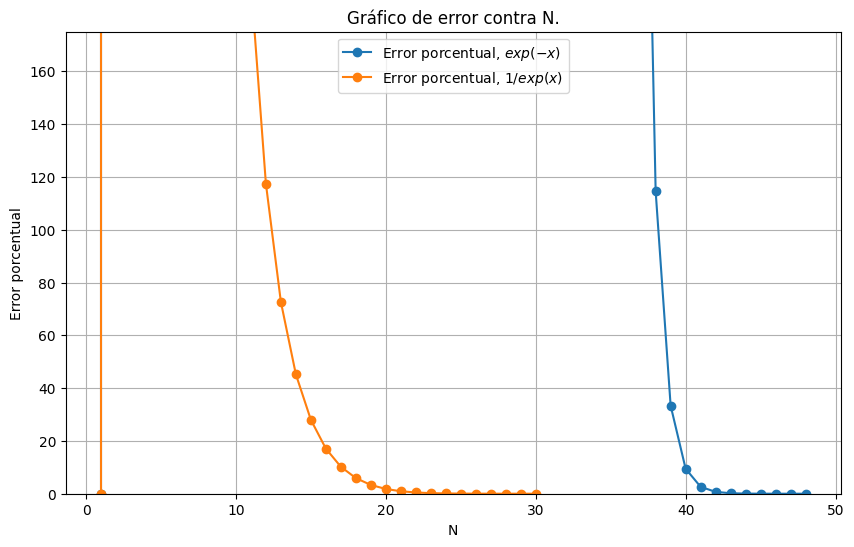

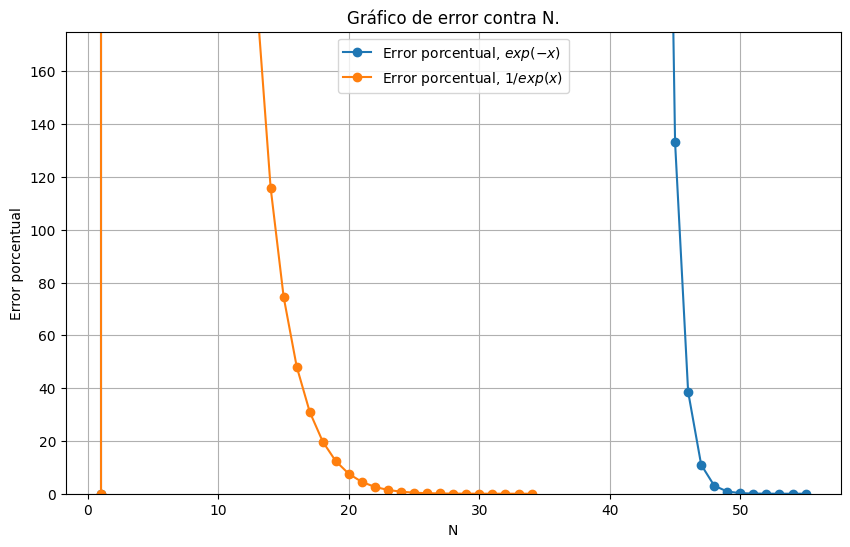

In [15]:
# e) Gráficos de error contra número de términos
for x in range(1, 14, 2):
  n_1, approx_value_1, exact_value_1, error_abs_1, errores_abs_1, errores_percent_1, termino_serie_1, suma_parcial_1 = taylor_exp(x)
  n_2, approx_value_2, exact_value_2, error_abs_2, errores_abs_2, errores_percent_2, termino_serie_2, suma_parcial_2 = taylor_exp_redef(x)
  N_1 = np.arange(1, n_1 + 1)
  N_2 = np.arange(1, n_2 + 1)
  plt.figure(figsize=(10, 6))
  plt.plot(N_1, errores_percent_1, label='Error porcentual, $exp(-x)$', marker='o')
  plt.plot(N_2, errores_percent_2, label='Error porcentual, $1 / exp (x)$', marker='o')
  plt.xlabel('N')
  plt.ylabel('Error porcentual')
  plt.ylim(0, 175)
  plt.title(f'Gráfico de error contra N.')
  plt.grid(True)
  plt.legend()
  plt.show()

# 3. Serie $S_N$

Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes: \\

-
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados númericos  pueden tener diferencias.


a.  Escribir tres funciones para que realicen el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$


b. Estudiar la convergencia de la serie para los tres casos.


c. Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $$E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|,$$ $i = 1, 2$. Considere valores de $N = 1\times 10^{6}$.

d. Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

In [72]:
# a) Definición de series

def S_N_1(N: int):

  """
  Docstring!
  """

  suma = 0
  suma_parcial = np.zeros(2 * N + 1)
  for n in range(1, 2 * N + 1):
    term = (-1) ** n * (n / (n + 1))
    suma += term

    suma_parcial[n] = suma

  return suma_parcial[1:]


def S_N_2(N: int):

  """
  Docstring!
  """

  suma = 0
  suma_parcial = np.zeros(N + 1)
  for n in range(1, N + 1):
    term_1 = - (2 * n - 1) / (2 * n)
    term_2 = (2 * n) / (2 * n + 1)
    suma += term_1 + term_2

    suma_parcial[n] = suma

  return suma_parcial[1:]


def S_N_3(N: int):

  """
  Docstring!
  """

  suma = 0
  suma_parcial = np.zeros(N + 1)
  for n in range(1, N + 1):
    term = 1 / (2 * n * (2 * n + 1))
    suma += term

    suma_parcial[n] = suma

  return suma_parcial[1:]



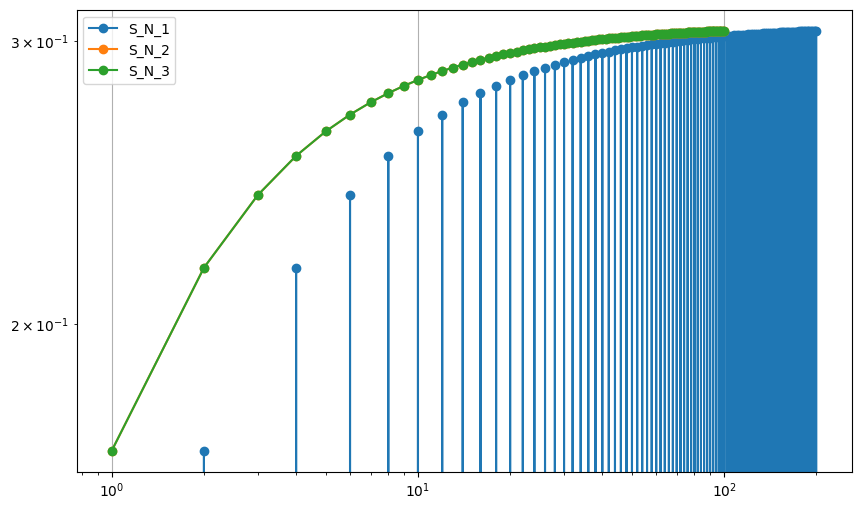

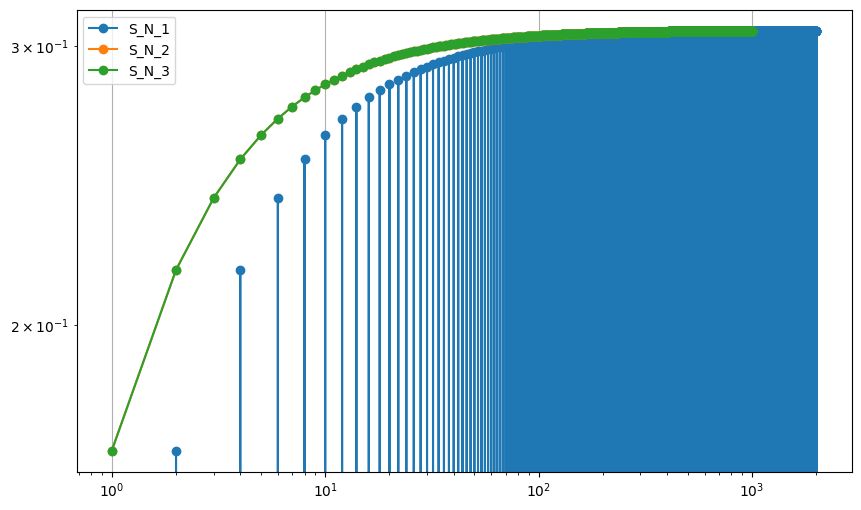

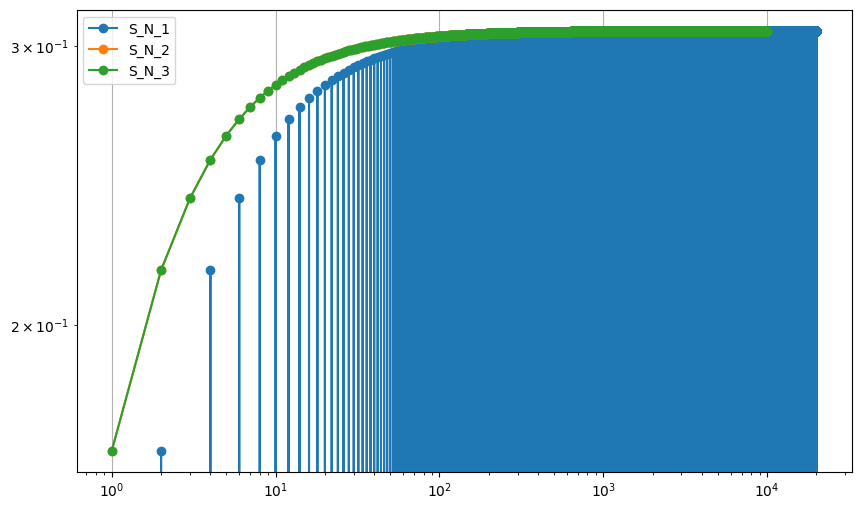

In [73]:
# b) Análisis de la convergencia para las series
for N in [int(1e2), int(1e3), int(1e4)]:
  suma_parcial_1 = S_N_1(N)
  suma_parcial_2 = S_N_2(N)
  suma_parcial_3 = S_N_3(N)

  x_1 = np.arange(1, 2 * N + 1)
  x_2 = np.arange(1, N + 1)

  plt.figure(figsize=(10, 6))
  plt.loglog(x_1, suma_parcial_1, label='S_N_1', marker='o')
  plt.loglog(x_2, suma_parcial_2, label='S_N_2', marker='o')
  plt.loglog(x_2, suma_parcial_3, label='S_N_3', marker='o')
  plt.grid(True)
  plt.legend()
  plt.show()

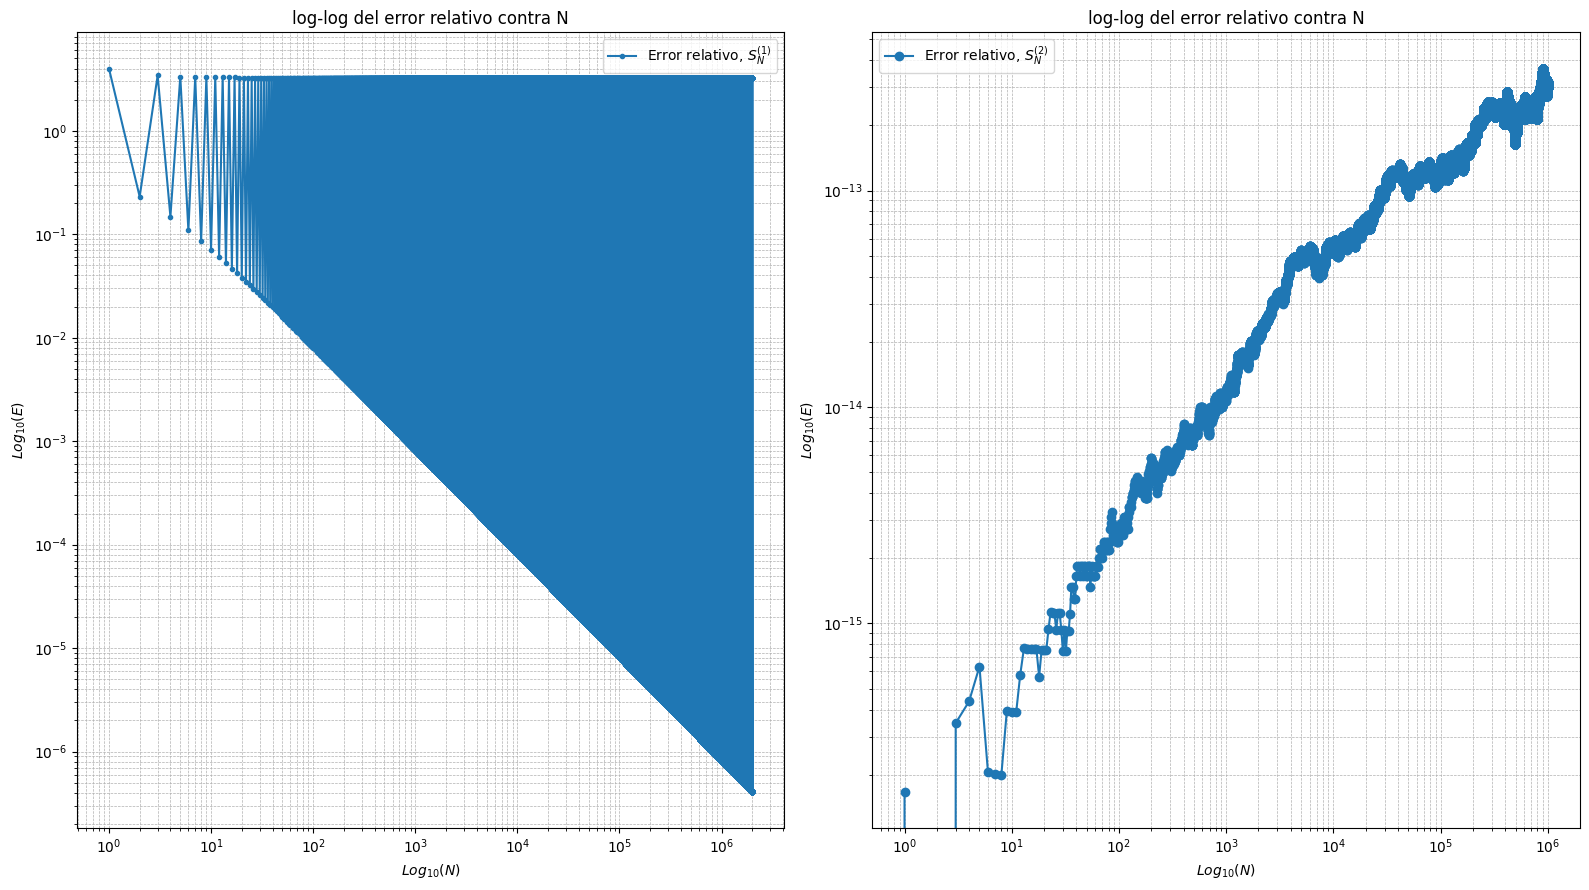

In [74]:
# c) Gráficos loglog de error versus N
Ns = int(1e6)  # [int(1e2), int(1e3), int(1e4), int(1e5), int(1e6)]


error_relativo_1 = np.abs((S_N_1(Ns) - S_N_3(2 * Ns)) / S_N_3(2 * Ns))  # S_N_1 itera hasta 2N. Por eso se considera S_N_3(2 * Ns)
                                                                       # De esta manera los arrays tiene igual dimensión.
error_relativo_2 = np.abs((S_N_2(Ns) - S_N_3(Ns)) / S_N_3(Ns))

# Gráficas
Ns_1 = np.arange(1, 2 * Ns + 1)
Ns_2 = np.arange(1, Ns + 1)
fig, (graf1, graf2) = plt.subplots(1, 2, figsize=(16, 9))
graf1.loglog(Ns_1, error_relativo_1, label='Error relativo, $S_N^{(1)}$', marker='.')
graf1.set_xlabel('$Log_{10}(N)$')
graf1.set_ylabel('$Log_{10}(E)$')
graf1.set_title('log-log del error relativo contra N')
graf1.grid(True, which="both", linestyle='--', linewidth=0.5)
graf1.legend()

graf2.loglog(Ns_2, error_relativo_2, label='Error relativo, $S_N^{(2)}$', marker='o')
graf2.set_xlabel('$Log_{10}(N)$')
graf2.set_ylabel('$Log_{10}(E)$')
graf2.set_title('log-log del error relativo contra N')
graf2.grid(True, which="both", linestyle='--', linewidth=0.5)
graf2.legend()

plt.tight_layout()
plt.show()


# d) Análisis de convergencia y errores relativos.
Para los gráficos de la convergencia de $S_N^{(1)}$, $S_N^{(2)}$ y $S_N^{(3)}$,  esta última converge más rápido y con mayor estabilidad por la ausencia de cancelaciones sustractivas. \\
Por otro lado,  el gráfico $log-log$ de $S_N^{(1)}$ muestra la oscilación constante del error relativo a medida que N aumenta sin llegar a equilibrarse. Dicho comportamiento obedece a las cancelaciones sustractivas por términos alternantes, lo que aumenta los errores de redondeo a medida que cada término aporta poco en la suma parcial. \\
El gráfico de $S_N^{(2)}$ muestra un comportamiento más uniforme en el comportamiento del error (siempre en aumento) basado en las mismas razones anteriores.